In [1]:
from graph_tool.all import *
import graph_tool.all as gt
from scipy.sparse import csr_matrix
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
Node = 1000

net_list = ["SF", "Cutoff", "RA", "IPA_beta1", "IPA_beta3", "IPA_beta4", "IPA_beta100"]

times = 100

m = 4

In [3]:
def three_loop(A):
    trace_A = A.diagonal().sum()
    N_C = trace_A / 6
    return N_C

def four_loop(g, A):
    M = g.num_edges()

    degrees = g.get_out_degrees(g.get_vertices())

    trace_A = A.diagonal().sum()

    sum_k = np.sum(degrees * (degrees -1))

    N_C = (1/8) * (trace_A - 2 * sum_k - 2 * M)

    return N_C

def five_loop(g, A3, A5):
    trace_A_3 = A3.diagonal().sum()
    trace_A_5 = A5.diagonal().sum()

    degrees = g.get_out_degrees(g.get_vertices())

    sum_k = np.sum(A3.diagonal() * (degrees - 2))

    N_C = (1/10) * (trace_A_5 - 5 * sum_k - 5 * trace_A_3)

    return N_C

# プロット関数
def plot_histogram(data, times):
    min_val = np.min(data)
    max_val = np.max(data)
    bins = np.linspace(min_val, max_val, 11)  # 10区間に分割

    # ヒストグラムの度数を取得し、度数をtimesで割って割合にする
    counts, bin_edges = np.histogram(data, bins=bins)
    frequency_ratios = counts / times

    # 手動で割合をプロット
    plt.bar(bin_edges[:-1], frequency_ratios, width=np.diff(bin_edges), edgecolor='black', align='edge')

    plt.xlabel("Value")
    plt.ylabel("Frequency Ratio")
    plt.ylim(0, frequency_ratios.max() + 0.1)  # y軸の最大値を最大割合 + 0.1 に設定
    plt.grid(False)

In [4]:
def count_H1(g):
    # 辺数を取得
    return g.num_edges()

def count_H2(g):
    degrees = g.get_out_degrees(g.get_vertices())
    return np.sum(degrees * (degrees - 1)) / 2

def count_H3(g, nG_C3, A2):
    degrees = g.get_out_degrees(g.get_vertices())
    sum_H3 = 0
    n = A2.shape[0]
    
    for i in range(n):
        for j in range(i + 1, n):
            if g.edge(i,j):  # エッジが存在する場合のみ
                sum_H3 += (degrees[i] - 1) * (degrees[j] - 1)
                
    # 三角形の数を引く
    return sum_H3 - 3 * nG_C3

def count_H4(g):
    degrees = g.get_out_degrees(g.get_vertices())
    return np.sum(degrees * (degrees - 1) * (degrees - 2)) / 6

def count_H6(A2,g):
    # A^2 の非対角成分に対して計算
    sum_H6 = 0
    n = A2.shape[0]
    
    for i in range(n):
        for j in range(i + 1, n):
            if g.edge(i,j):  # エッジが存在する場合のみ
                sum_H6 += (A2[i, j] * (A2[i, j] - 1)) / 2

    return sum_H6

def count_H9(g, A2, H6):
    degrees = g.get_out_degrees(g.get_vertices())
    sum_H9 = 0
    n = A2.shape[0]

    degree_ad = []
    inner = []
    for i in range(n):
        if degrees[i] >= 3:
            degree_adjustment = degrees[i] - 2
            degree_ad.append(degree_adjustment)
        else:
            continue

        inner_sum = 0
        for j in range(n):
            if i != j:
                inner_sum += ((A2[i, j]) * (A2[i, j] - 1)) / 2
        inner.append(inner_sum)

    for k in range(len(degree_ad)):
        sum_H9 += degree_ad[k] * inner[k]
        
    return sum_H9 - 2 * H6

def count_H11(A3, nG_H6):
    # A^3の対角成分を取得
    diag_A3 = A3.diagonal()

    # 対角成分を1/2し、その組み合わせ数を計算
    sum_H11 = np.sum((diag_A3 / 2) * ((diag_A3 / 2) - 1)) / 2
    
    return sum_H11 - 2 * nG_H6

100%|██████████| 100/100 [35:10<00:00, 21.10s/it]

SF_three_loop: 508.0 749.0
SF_four_loop: 5254.0 9169.0
SF_five_loop: 58123.0 115187.0
SF_six_loop: 670960.0 1481746.0


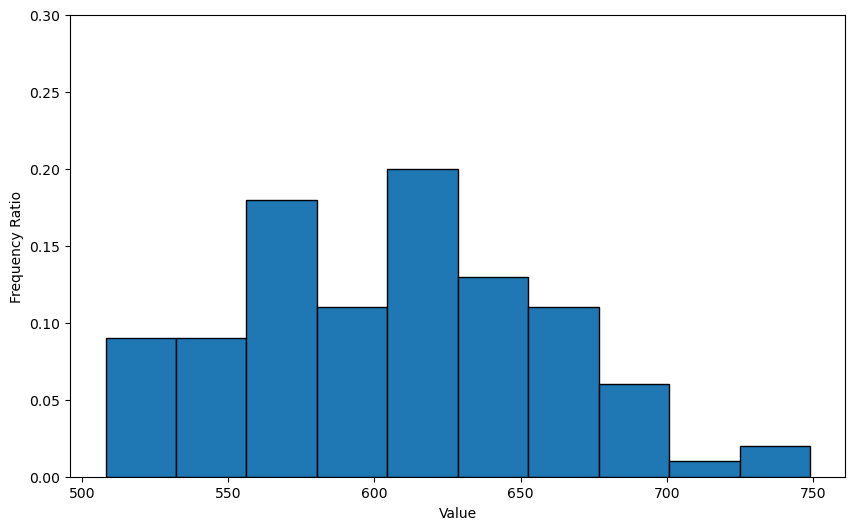

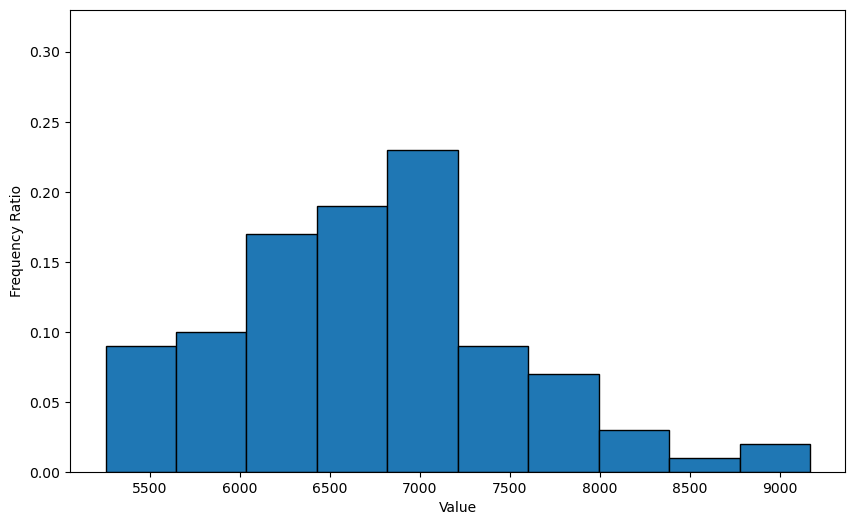

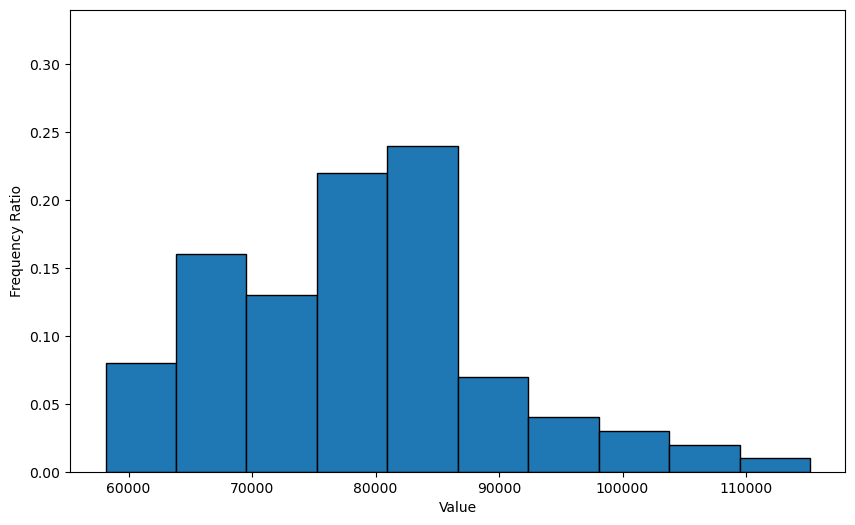

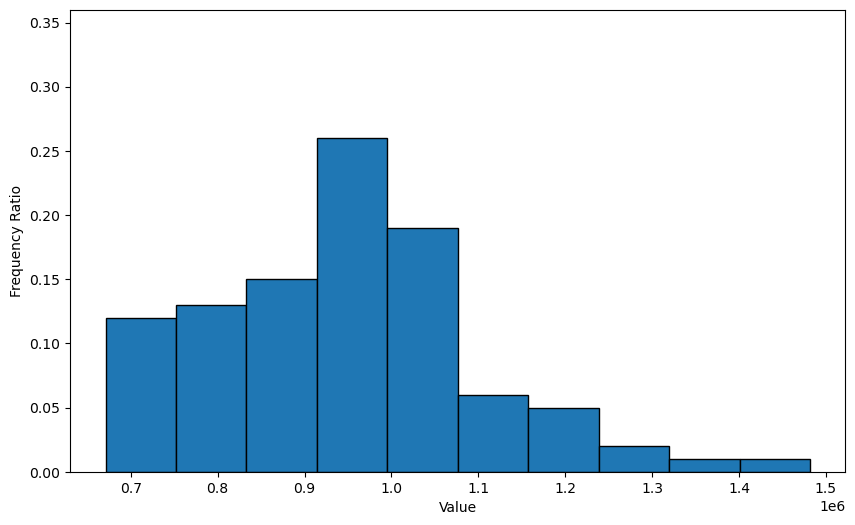

100%|██████████| 100/100 [34:32<00:00, 20.73s/it]

Cutoff_three_loop: 164.0 245.0
Cutoff_four_loop: 1445.0 1935.0
Cutoff_five_loop: 11684.0 17320.0
Cutoff_six_loop: 100209.0 159256.0


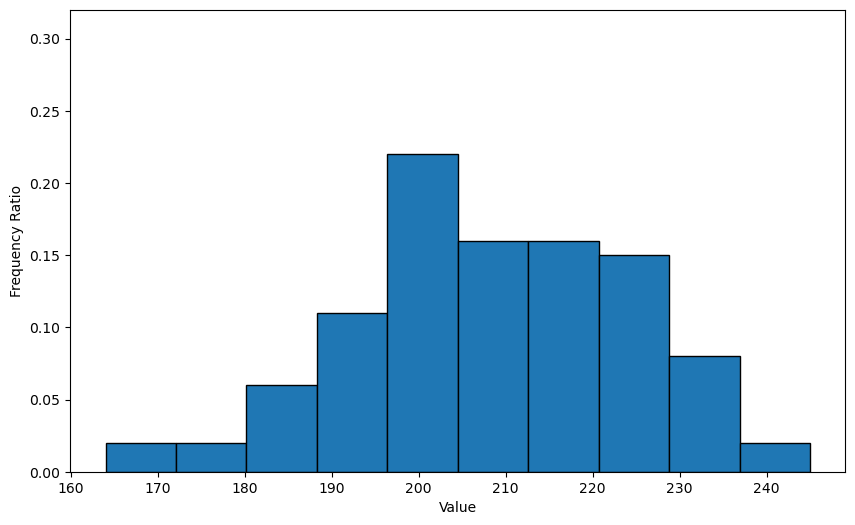

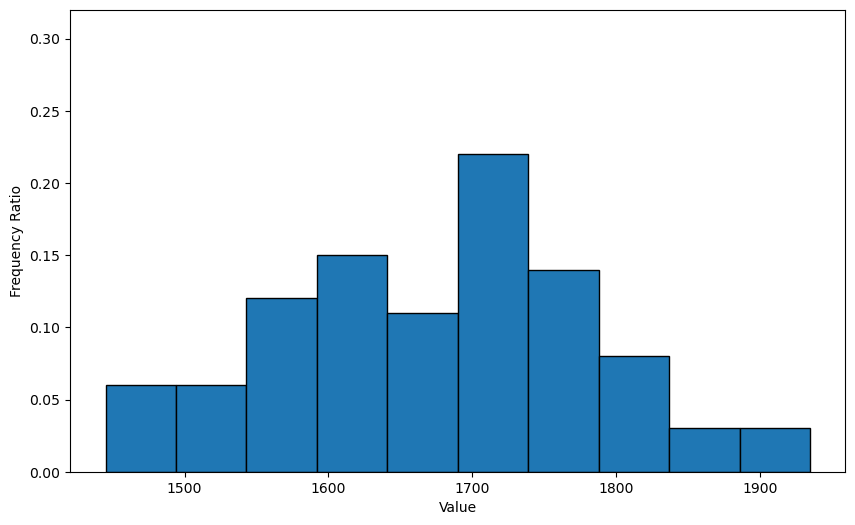

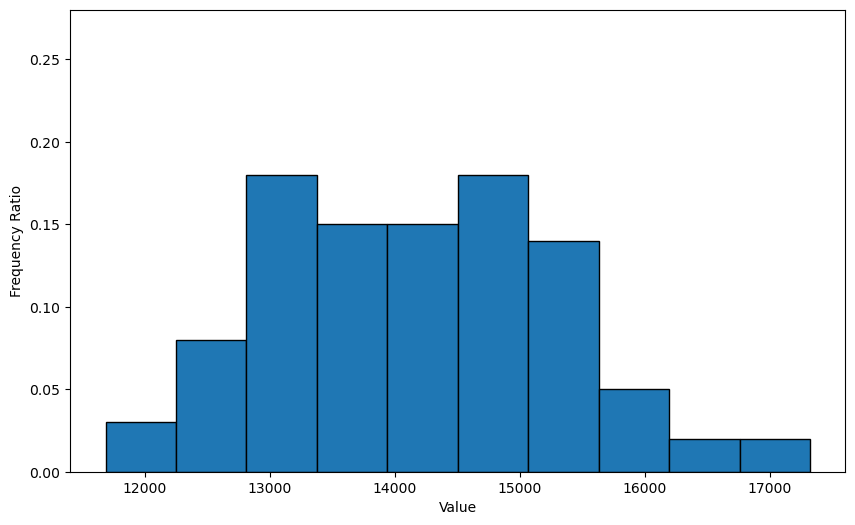

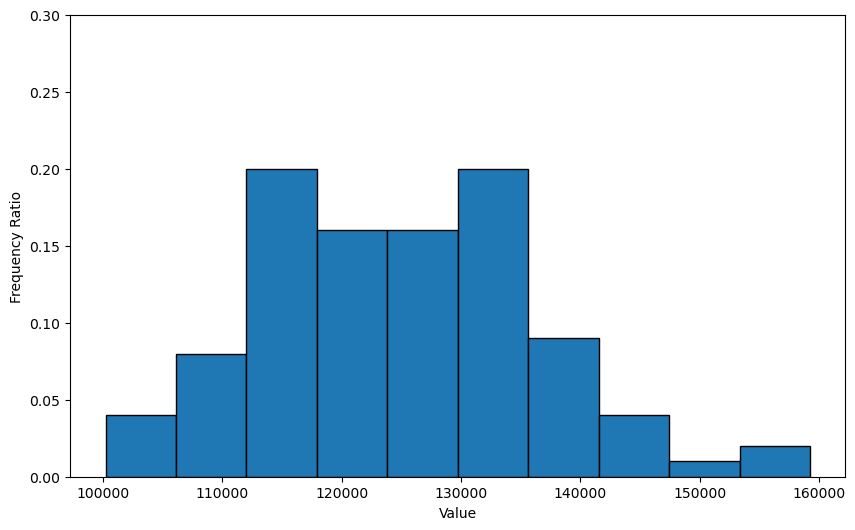

100%|██████████| 100/100 [34:20<00:00, 20.61s/it]

RA_three_loop: 104.0 179.0
RA_four_loop: 853.0 1053.0
RA_five_loop: 6337.0 7863.0
RA_six_loop: 47878.0 61514.0


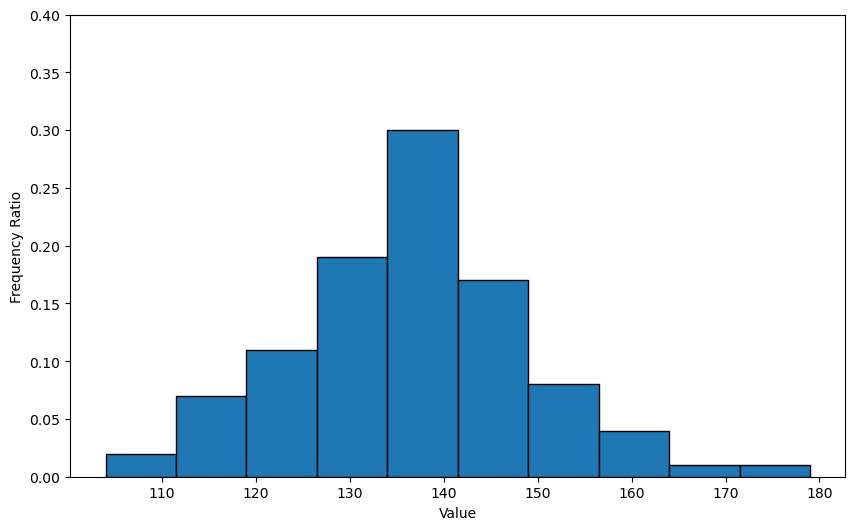

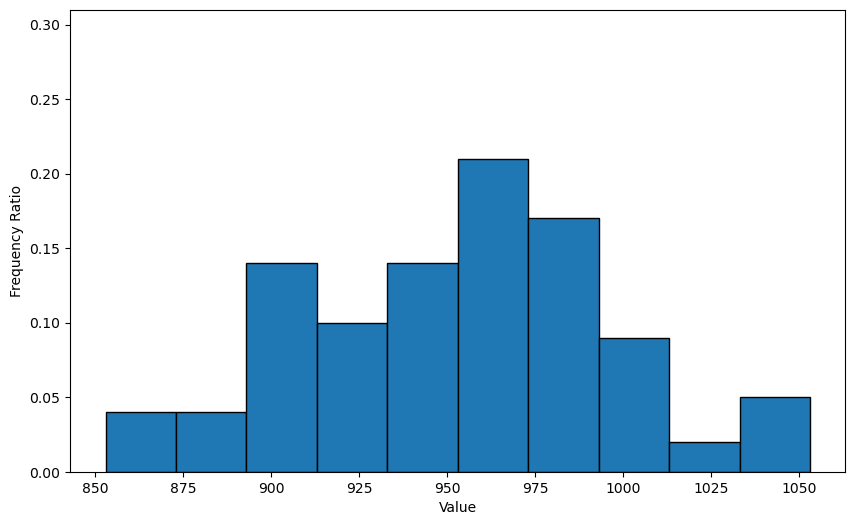

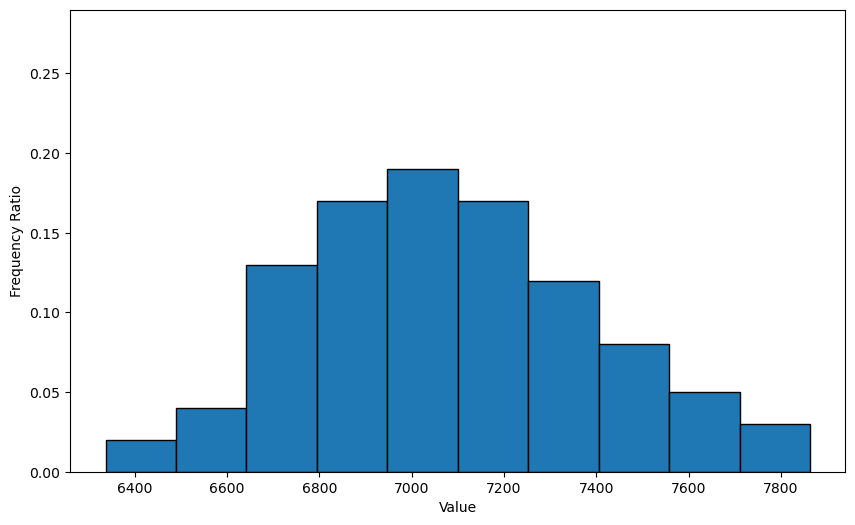

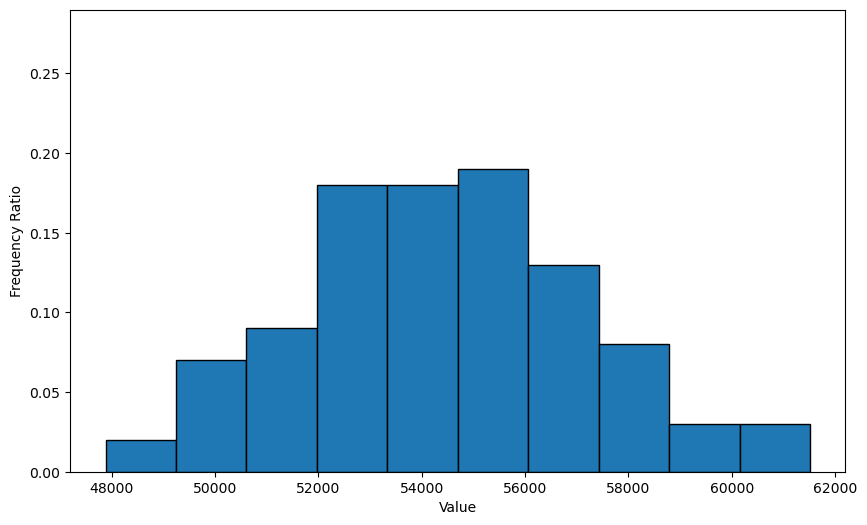

100%|██████████| 100/100 [34:13<00:00, 20.54s/it]

IPA_beta1_three_loop: 70.0 117.0
IPA_beta1_four_loop: 532.0 664.0
IPA_beta1_five_loop: 3686.0 4176.0
IPA_beta1_six_loop: 25552.0 28968.0


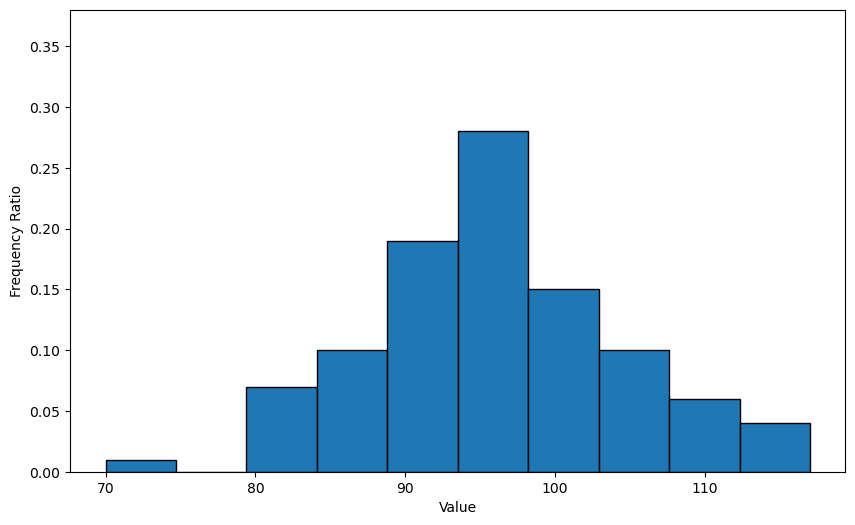

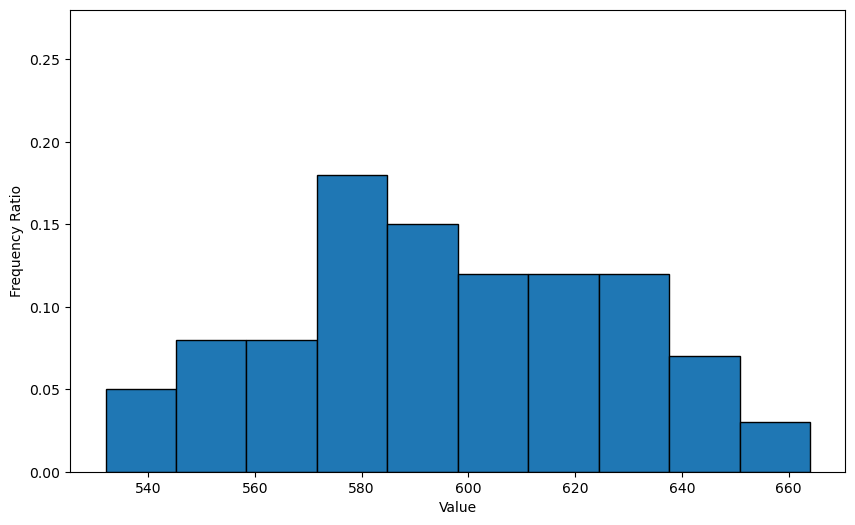

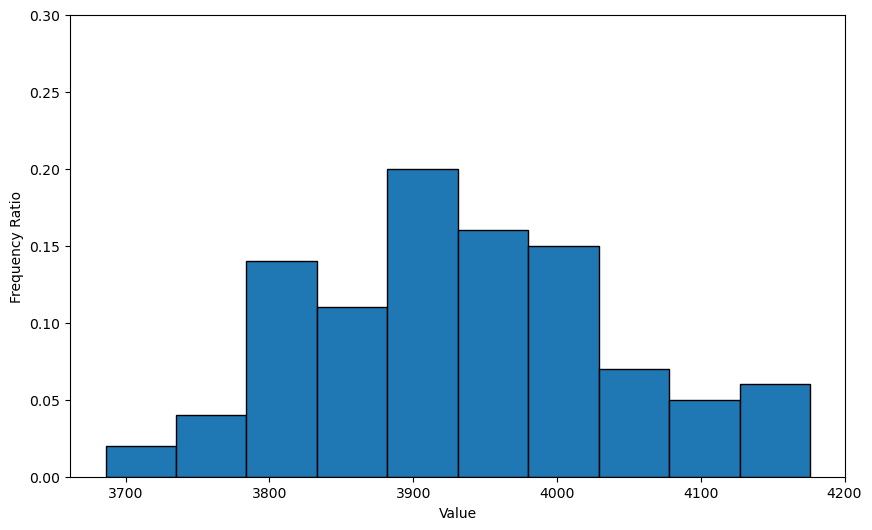

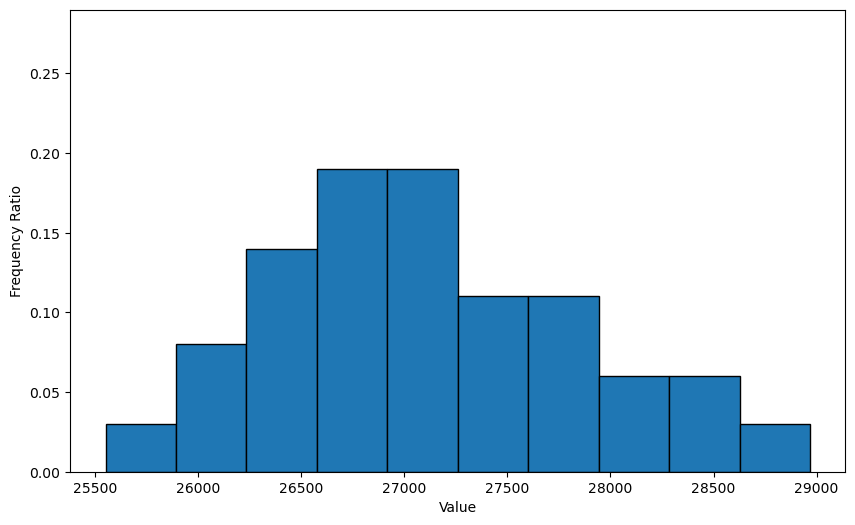

100%|██████████| 100/100 [34:04<00:00, 20.44s/it]

IPA_beta3_three_loop: 56.0 87.0
IPA_beta3_four_loop: 365.0 466.0
IPA_beta3_five_loop: 2374.0 2627.0
IPA_beta3_six_loop: 15320.0 16320.0


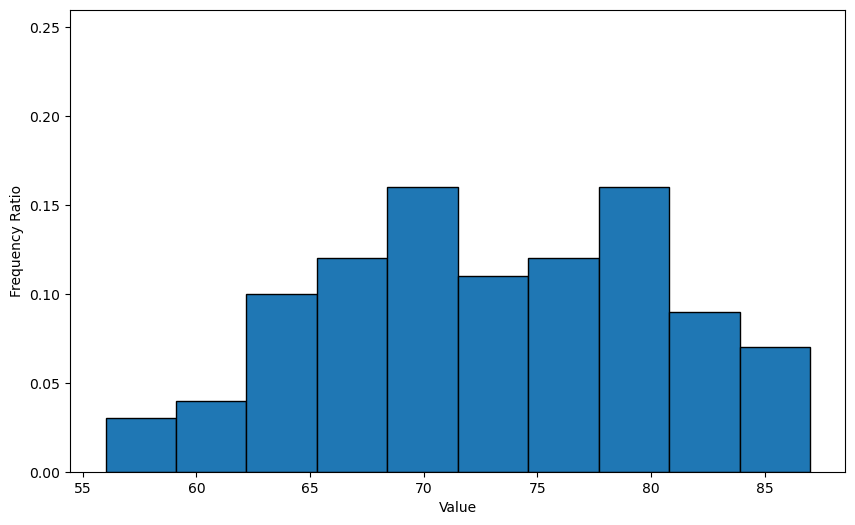

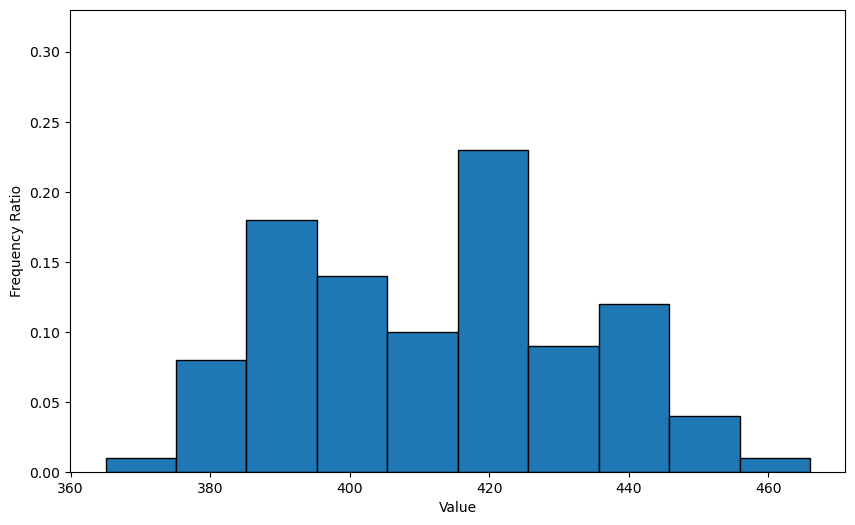

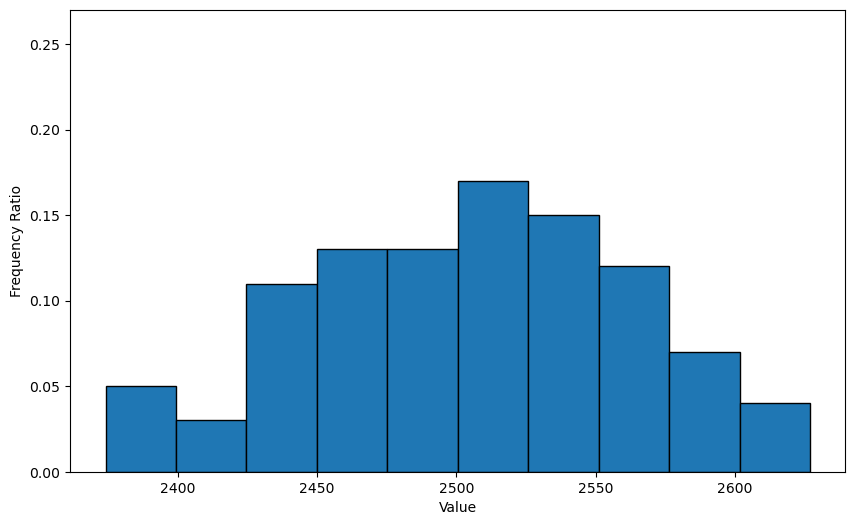

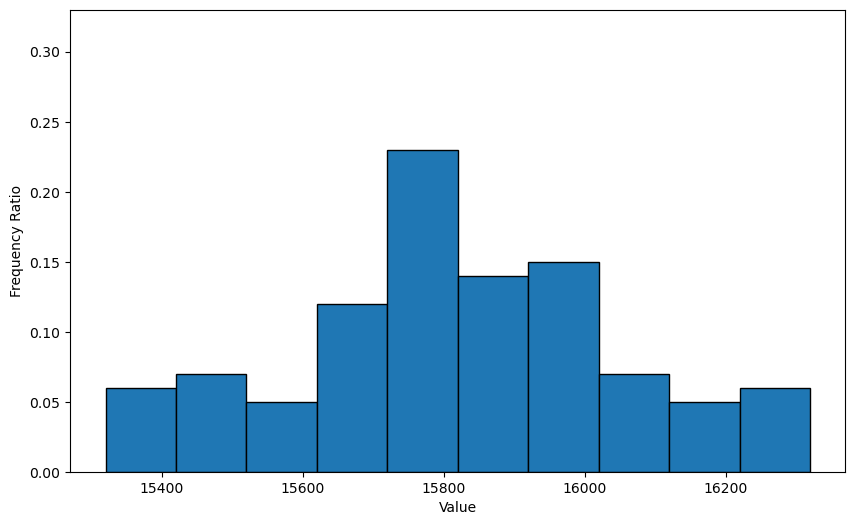

100%|██████████| 100/100 [34:05<00:00, 20.46s/it]

IPA_beta4_three_loop: 49.0 90.0
IPA_beta4_four_loop: 331.0 426.0
IPA_beta4_five_loop: 2162.0 2416.0
IPA_beta4_six_loop: 13543.0 14575.0


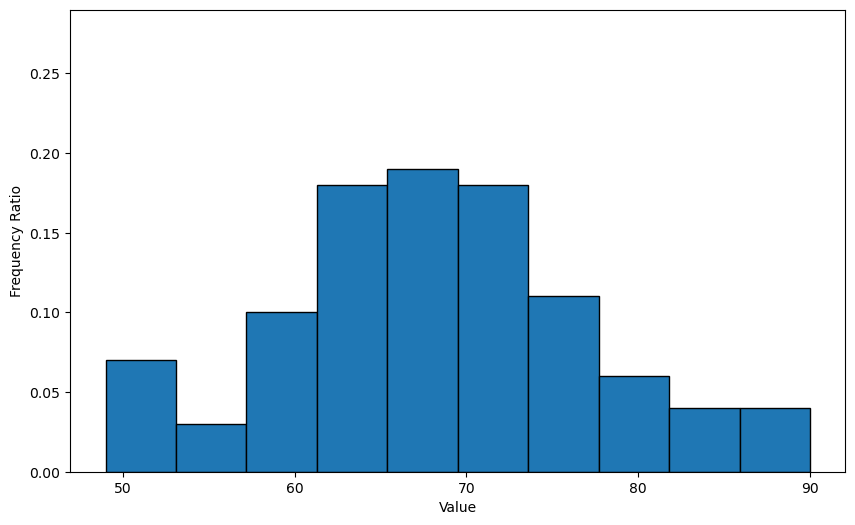

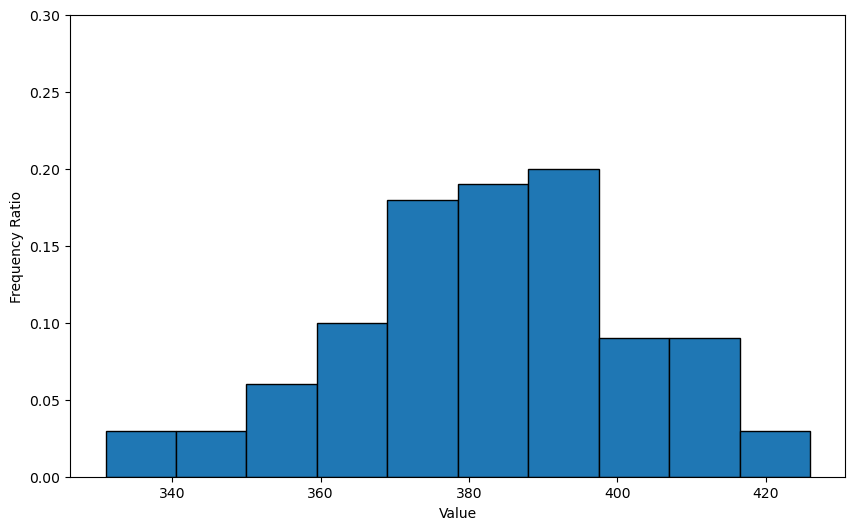

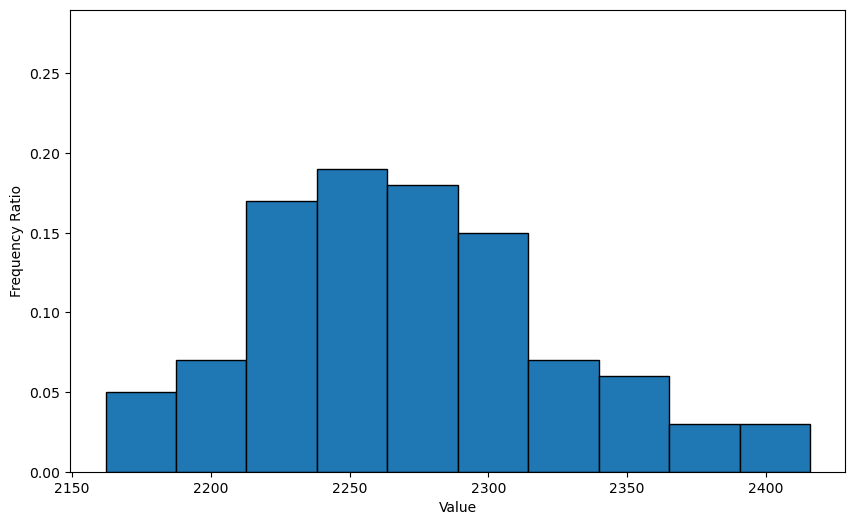

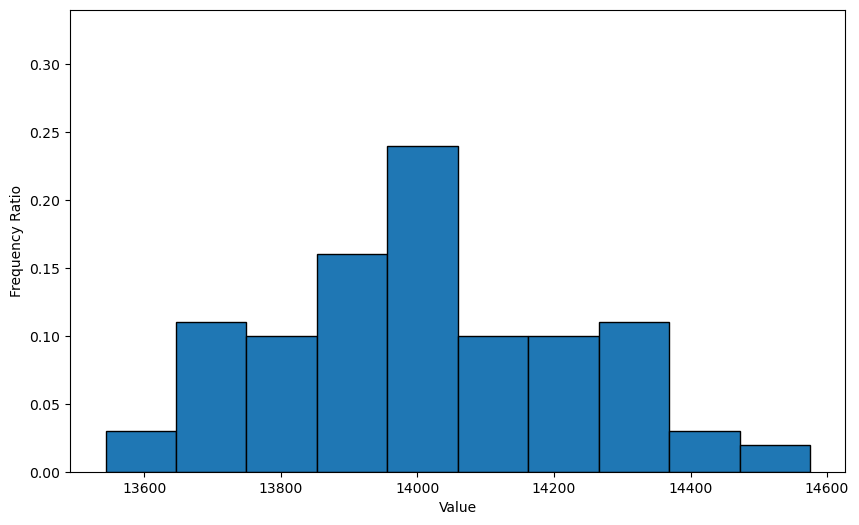

100%|██████████| 100/100 [34:05<00:00, 20.45s/it]

IPA_beta100_three_loop: 34.0 74.0
IPA_beta100_four_loop: 258.0 337.0
IPA_beta100_five_loop: 1552.0 1803.0
IPA_beta100_six_loop: 9489.0 9900.0


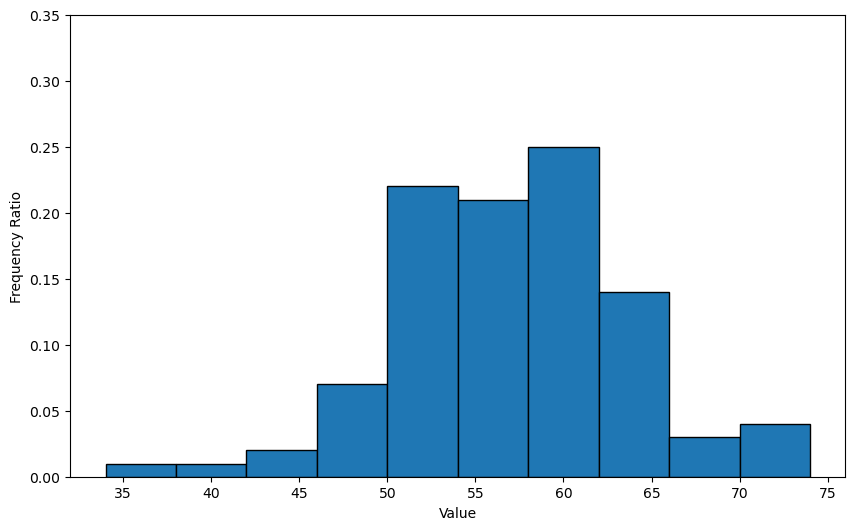

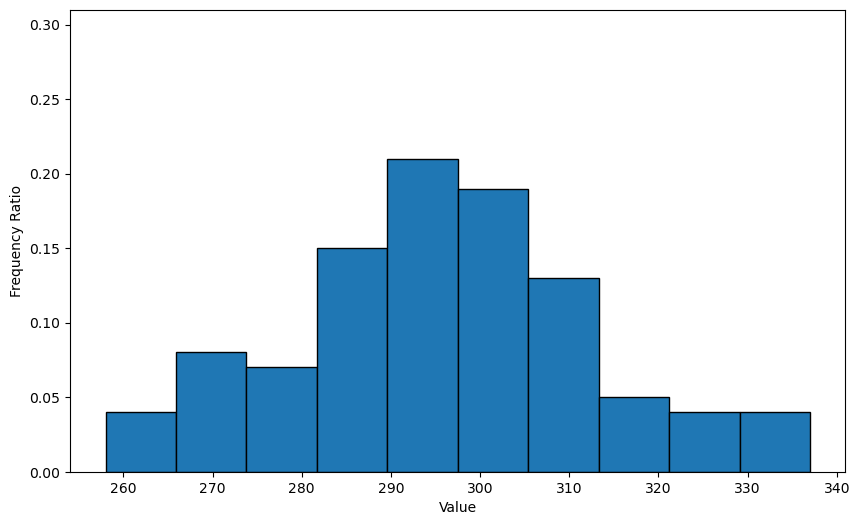

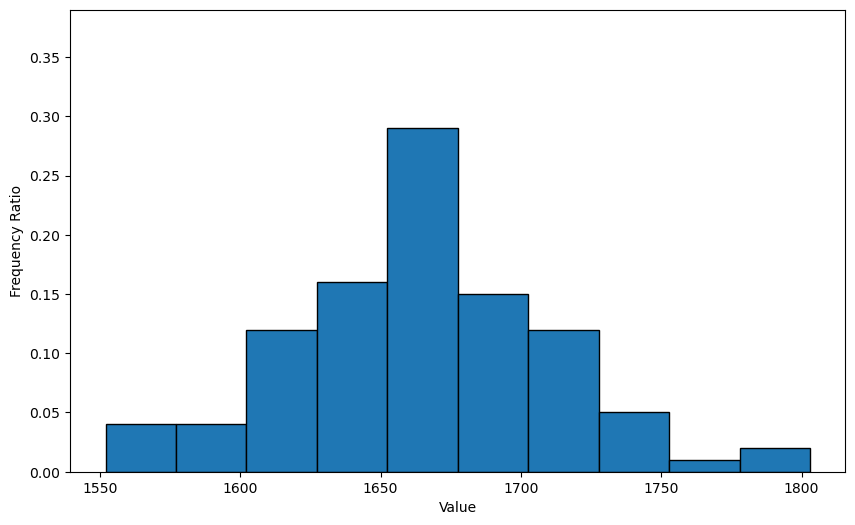

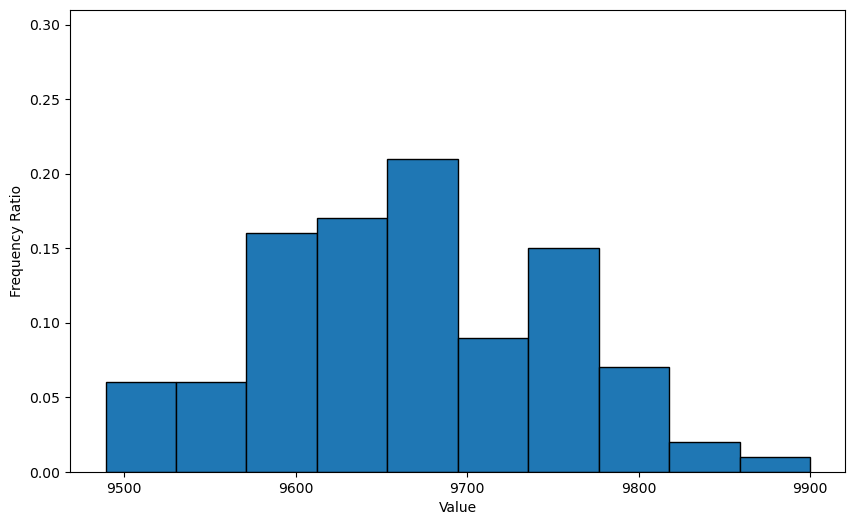

In [6]:
three_all = []
three_var = []
four_all = []
four_var = []
five_all = []
five_var = []
six_all = []
six_var = []
#ave_loop_all = []
three_list = []
four_list = []
five_list = []
six_list = []

for net in net_list:
    
    three_sum = []
    four_sum = []
    five_sum = []
    six_sum = []
    #ave_loop_list = []

    for i in tqdm(range(times)):
        g = load_graph(f"~/o_t_hayashilab/Network_data/graph-tool/pure_pk/N={Node}/m={m}/{net}/{i}.gt.gz")

        A = adjacency(g).tocsc()
        A_2 = A @ A
        A_3 = A_2 @ A
        A_4 = A_2 @ A_2
        A_5 = A_4 @ A
        A_6 = A_3 @ A_3

        N_C3 = three_loop(A_3)
        N_C4 = four_loop(g, A_4)
        N_C5 = five_loop(g, A_3, A_5)
        # サブグラフ数を計算
        H1 = count_H1(g)
        H2 = count_H2(g)
        H3 = count_H3(g, N_C3, A_2)
        H4 = count_H4(g)
        H6 = count_H6(A_2,g)
        H9 = count_H9(g, A_2, H6)
        H11 = count_H11(A_3, H6)

        # 六角形のループ数 nG(C_6) の計算
        trace_A6 = A_6.diagonal().sum()
        N_C6 = (1 / 12) * (trace_A6 
                            - 2 * H1 
                            - 12 * H2 
                            - 24 * N_C3
                            - 6 * H3 
                            - 12 * H4 
                            - 48 * N_C4
                            - 36 * H6 
                            - 12 * H9 
                            - 24 * H11)

        #print("三角形の数：", N_C3)
        #print("四角形の数：", N_C4)
        #print("五角形の数：", N_C5)

        three_sum.append(N_C3)
        four_sum.append(N_C4)
        five_sum.append(N_C5)
        six_sum.append(N_C6)
＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
        #ave_loop = (3 * N_C3 + 4 * N_C4 + 5 * N_C5) / (N_C3 + N_C4 + N_C5)
        #ave_loop_list.append(ave_loop)

    three_ave = np.mean(three_sum)
    three_min = np.min(three_sum)
    three_max = np.max(three_sum)
    print(f"{net}_three_loop:", three_min, three_max)
    three_all.append(three_ave)
    var = np.var(three_sum)
    three_var.append(var)
    three_list.append(three_sum)

    four_ave = np.mean(four_sum)
    four_min = np.min(four_sum)
    four_max = np.max(four_sum)
    print(f"{net}_four_loop:", four_min, four_max)
    four_all.append(four_ave)
    var = np.var(four_sum)
    four_var.append(var)
    four_list.append(four_sum)

    five_ave = np.mean(five_sum)
    five_min = np.min(five_sum)
    five_max = np.max(five_sum)
    print(f"{net}_five_loop:", five_min, five_max)
    five_all.append(five_ave)
    var = np.var(five_sum)
    five_var.append(var)
    five_list.append(five_sum)

    six_ave = np.mean(six_sum)
    six_min = np.min(six_sum)
    six_max = np.max(six_sum)
    print(f"{net}_six_loop:", six_min, six_max)
    six_all.append(six_ave)
    var = np.var(six_sum)
    six_var.append(var)
    six_list.append(six_sum)

    #ave_all = np.mean(ave_loop_list)
    #ave_loop_all.append(ave_all)

    # three_sum の頻度分布プロット
    plt.figure(figsize=(10, 6))
    plot_histogram(three_sum, times)
    plt.show()

    # four_sum の頻度分布プロット
    plt.figure(figsize=(10, 6))
    plot_histogram(four_sum, times)
    plt.show()

    # five_sum の頻度分布プロット
    plt.figure(figsize=(10, 6))
    plot_histogram(five_sum, times)
    plt.show()

     # six_sum の頻度分布プロット
    plt.figure(figsize=(10, 6))
    plot_histogram(six_sum, times)
    plt.show()




In [7]:
three_all

[606.31, 208.26, 136.06, 95.92, 72.93, 68.23, 56.51]

In [8]:
four_all

[6718.7, 1674.34, 952.4, 596.45, 412.72, 382.41, 295.51]

In [9]:
five_all

[78720.38, 14181.69, 7075.0, 3934.24, 2503.75, 2272.06, 1664.95]

In [10]:
six_all

[944450.02, 124901.97, 54499.78, 27101.22, 15819.45, 14014.69, 9667.53]

In [8]:
ave_loop_all

[4.878879482412926,
 4.821300644440961,
 4.792586204225514,
 4.761225025889815,
 4.736318338113049,
 4.729850314823688,
 4.707927922415772]

In [9]:
three_var

[1607.8936,
 107.8451,
 50.6856,
 34.2019,
 26.9579,
 27.324399999999997,
 23.080399999999994]

In [10]:
four_var

[176749.5771,
 2646.2251,
 497.62160000000006,
 206.88990000000004,
 107.33440000000002,
 114.14560000000002,
 74.40640000000002]

In [12]:
five_var

[20715358.88,
 116754.44840000002,
 6981.489600000001,
 1565.0200000000002,
 440.75,
 471.3931,
 277.6651]

In [11]:
six_var

[22929326923.9596,
 132333063.44910002,
 7899475.2316,
 560036.8116,
 54634.02749999999,
 48361.293900000004,
 7162.0891]

In [71]:
five_list[0]

[68735.0,
 67282.0,
 115187.0,
 107863.0,
 78788.0,
 82547.0,
 78731.0,
 98511.0,
 79245.0,
 99497.0,
 90642.0,
 83888.0,
 71410.0,
 81115.0,
 81962.0,
 84342.0,
 68339.0,
 87907.0,
 82155.0,
 86846.0,
 85653.0,
 76363.0,
 72342.0,
 63706.0,
 64483.0,
 67994.0,
 78260.0,
 77590.0,
 68856.0,
 63837.0,
 62625.0,
 78168.0,
 70632.0,
 63681.0,
 65000.0,
 93532.0,
 63351.0,
 72684.0,
 82853.0,
 78231.0,
 85422.0,
 76196.0,
 82696.0,
 67067.0,
 76725.0,
 83664.0,
 77415.0,
 68881.0,
 61992.0,
 61817.0,
 83430.0,
 69559.0,
 77377.0,
 64346.0,
 90314.0,
 81237.0,
 81098.0,
 86484.0,
 84490.0,
 81344.0,
 88659.0,
 75802.0,
 79605.0,
 84641.0,
 66918.0,
 82490.0,
 98805.0,
 97508.0,
 75597.0,
 85273.0,
 68107.0,
 72154.0,
 69403.0,
 83770.0,
 86509.0,
 74380.0,
 79015.0,
 68690.0,
 93571.0,
 84955.0,
 80821.0,
 70438.0,
 84006.0,
 58123.0,
 92028.0,
 73503.0,
 63642.0,
 78927.0,
 73925.0,
 75683.0,
 90964.0,
 80801.0,
 77410.0,
 74176.0,
 80088.0,
 72119.0,
 96398.0,
 73171.0,
 68791.0,
 104785.